In [137]:
import rdkit

In [138]:
from rdkit import Chem

In [139]:
import pandas as pd

In [140]:
df=pd.read_csv('bioactivity_data_preprocessed.csv')

In [141]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [142]:
#inspired by : http://codeocean.com/explore/capsule?query=tag:dara-curation
Lipinski.NumHAcceptors
Lipinski.NumHDonors

<function rdkit.Chem.Lipinski.<lambda>(x)>

In [143]:
def lipinski (smiles, verbose = False):
    moldata=[]
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
        
    baseData=np.arange(1,1)
    i=0
    for mol in moldata:
        
        desc_MolWt= Descriptors.MolWt(mol)
        desc_MolLogP= Descriptors.MolLogP(mol)
        desc_NumHDonors=Lipinski.NumHDonors(mol)
        desc_NumHAcceptors=Lipinski.NumHAcceptors(mol)
        
        row =np.array ([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        
        if (i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    columnNames=["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
    return descriptors

In [144]:
df_lipinski = lipinski(df.canonical_smiles)

In [145]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
128,338.359,3.40102,0.0,5.0
129,296.366,3.44330,0.0,3.0
130,276.291,4.09564,0.0,3.0
131,278.307,3.29102,0.0,3.0


In [146]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [147]:
df_combined = pd.concat ([df, df_lipinski], axis=1)

In [148]:
df_combined #last four columns are integrated here

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive,338.359,3.40102,0.0,5.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive,296.366,3.44330,0.0,3.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive,276.291,4.09564,0.0,3.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive,278.307,3.29102,0.0,3.0


In [149]:
import numpy as np

In [150]:
def pIC50(input):
    pIC50 = []
    
    for i in input ["standard_value_norm"]:
        molar = i*(10**9) #converts nM to M
        pIC50.append(-np.log10(molar))
        
    input ["pIC50"] = pIC50
    x= input.drop ("standard_value_norm", 1)
    
    return x

In [151]:
df_combined.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [152]:
-np.log10 ( (10**-9)* 100000000)

1.0

In [153]:
-np.log10 ( (10**-9)* 10000000000)

-1.0

In [154]:
def norm_value (input):
    norm=[]
    
    for i in input['standard_value']:
        if i > 100000000:
            i=100000000
        norm.append(i)
        
    input["standard_value_norm"]=norm
    x=input.drop("standard_value", 1)
    
    return x

In [155]:
df_norm= norm_value (df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,10700.0


In [156]:
df_norm.standard_value_norm.describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [157]:
df_final = pIC50(df_norm) #when we are applying pIC50 value the max value will changed compare to initial
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0.0,5.0,-12.857332
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0.0,2.0,-12.973128
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,-13.130334
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,-13.117603
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0.0,5.0,-12.301030
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,-13.025306
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,-13.004321
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,-13.060698
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,-13.029384


In [158]:
df_final.pIC50.describe() #here we considered min value
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [159]:
#simple comparision between (removing the intermediates class from our data set)

In [160]:
df_2class = df_final[df_final.bioactivity_class != "intermediate"]
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,-13.130334
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,-13.117603
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,-11.991226
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,-11.977724
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,-13.049218
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,3.40102,0.0,5.0,-13.025306
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,3.44330,0.0,3.0,-13.004321
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,inactive,276.291,4.09564,0.0,3.0,-13.060698
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,inactive,278.307,3.29102,0.0,3.0,-13.029384


In [90]:
import seaborn as sns
sns.set (style="ticks")
import matplotlib.pyplot as plt

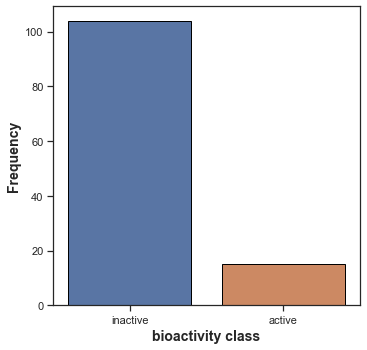

In [91]:
plt.figure (figsize=(5.5, 5.5))
sns.countplot(x='bioactivity_class', data=df_2class, edgecolor="black")
plt.xlabel('bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig ('plot_bioactivity_class.pdf')

In [92]:
import numpy as np

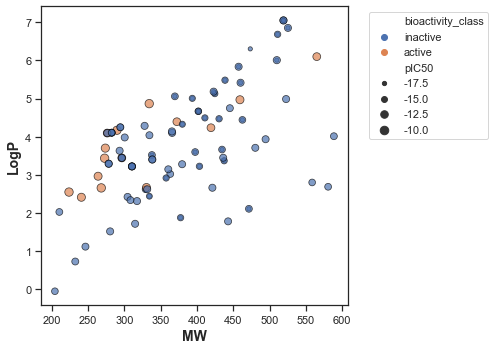

In [93]:
plt.figure (figsize=(5.5, 5.5))
sns.scatterplot(x='MW', y= 'LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.savefig('plot_MW_vs_LogP.pdf')

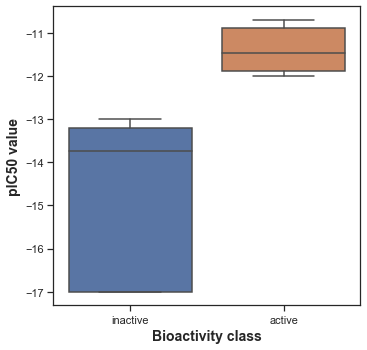

In [94]:
#for pIC50 values
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y= 'pIC50', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_ic50.pdf')

In [95]:
#stastical analysis \Mann-Whitney U test

In [125]:

def mannwhitney(descriptor, verbose=False):

    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    seed(1)
    selection = [descriptor, 'bioactivity_class']
    df= df_2class[selection]
    print(df)
    active = df[df.bioactivity_class == 'active']
    active = (active[descriptor])

    selection = [descriptor, 'bioactivity_class']
    df= df_2class[selection]
    inactive = df[df.bioactivity_class == 'inactive']
    inactive =(inactive[descriptor])

    stat, p = mannwhitneyu(active, inactive)
    #print ('Statistics=%.3f, p=%.3f' % (stat, p))
    
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    results = pd.DataFrame({'Descriptor': descriptor,
                        'Statistics': stat,
                        'p':p,
                        'alpha':alpha, 
                        'interpretation': interpretation}, index=[0])
    filename = 'mannwhitneyu_'+ descriptor + '.csv'       
    results.to_csv(filename)
    
    return results


In [126]:
mannwhitney('pIC50')

         pIC50 bioactivity_class
2   -13.130334          inactive
3   -13.117603          inactive
5   -11.991226            active
7   -11.977724            active
8   -13.049218          inactive
..         ...               ...
128 -13.025306          inactive
129 -13.004321          inactive
130 -13.060698          inactive
131 -13.029384          inactive
132 -13.897077          inactive

[119 rows x 2 columns]


,Descriptor,Statistics,p,alpha,interpretation
0,pIC50,0.0,1.662636e-10,0.05,Different distribution (reject H0)


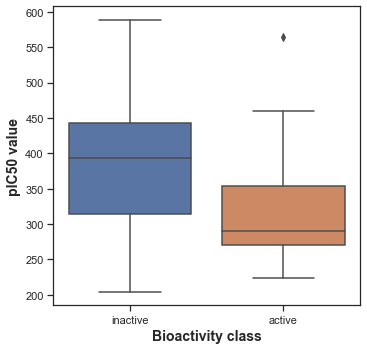

In [127]:
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y= 'MW', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_MW.pdf')

In [128]:
mannwhitney ("MW")

          MW bioactivity_class
2    421.190          inactive
3    293.347          inactive
5    372.243            active
7    419.243            active
8    327.792          inactive
..       ...               ...
128  338.359          inactive
129  296.366          inactive
130  276.291          inactive
131  278.307          inactive
132  282.383          inactive

[119 rows x 2 columns]


,Descriptor,Statistics,p,alpha,interpretation
0,MW,409.5,0.001525,0.05,Different distribution (reject H0)


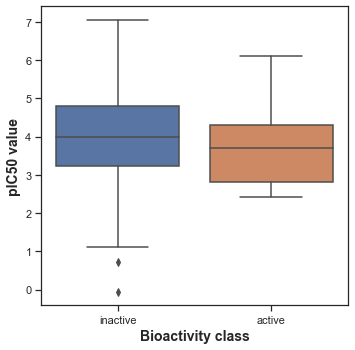

In [129]:
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y= 'LogP', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_LogP.pdf')

In [130]:
mannwhitney('LogP')

        LogP bioactivity_class
2    2.66050          inactive
3    3.63080          inactive
5    4.39330            active
7    4.23540            active
8    4.28420          inactive
..       ...               ...
128  3.40102          inactive
129  3.44330          inactive
130  4.09564          inactive
131  3.29102          inactive
132  4.10530          inactive

[119 rows x 2 columns]


,Descriptor,Statistics,p,alpha,interpretation
0,LogP,712.5,0.295805,0.05,Same distribution (fail to reject H0)


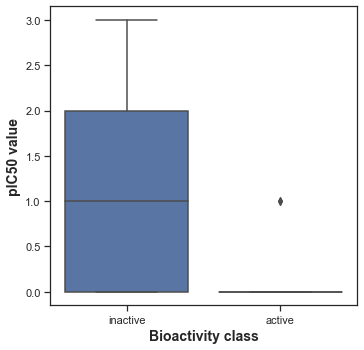

In [131]:
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y= 'NumHDonors', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHDonors.pdf')

In [132]:
mannwhitney("NumHDonors")

     NumHDonors bioactivity_class
2           0.0          inactive
3           0.0          inactive
5           0.0            active
7           0.0            active
8           0.0          inactive
..          ...               ...
128         0.0          inactive
129         0.0          inactive
130         0.0          inactive
131         0.0          inactive
132         0.0          inactive

[119 rows x 2 columns]


,Descriptor,Statistics,p,alpha,interpretation
0,NumHDonors,299.5,0.000024,0.05,Different distribution (reject H0)


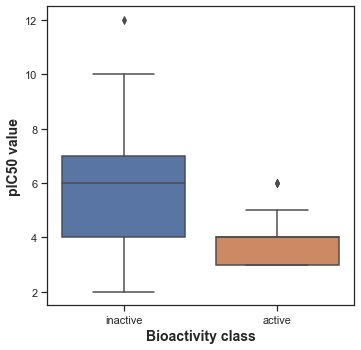

In [133]:
plt.figure (figsize=(5.5, 5.5))
sns.boxplot(x='bioactivity_class', y= 'NumHAcceptors', data=df_2class)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig('plot_NumHAcceptors.pdf')

In [134]:
mannwhitney('NumHAcceptors')

     NumHAcceptors bioactivity_class
2              4.0          inactive
3              3.0          inactive
5              3.0            active
7              3.0            active
8              3.0          inactive
..             ...               ...
128            5.0          inactive
129            3.0          inactive
130            3.0          inactive
131            3.0          inactive
132            2.0          inactive

[119 rows x 2 columns]


,Descriptor,Statistics,p,alpha,interpretation
0,NumHAcceptors,415.0,0.001557,0.05,Different distribution (reject H0)


In [136]:
! zip -r reults.zip . -i *. csv *.pdf

'zip' is not recognized as an internal or external command,
operable program or batch file.
